In [1]:
import pandas as pd
from meteonet_toolbox.constant import DOMAINS
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import numpy as np

In [2]:
PATH_DATASET = "data/dataset.csv"
df = pd.read_csv(PATH_DATASET)
df = df.dropna()
df.describe()

,number_sta,lat,lon,height_sta,mean_power,measures_number
count,2.320000e+02,232.000000,232.000000,232.000000,232.000000,232.000000
mean,3.650359e+07,44.148741,5.161254,534.547414,130.304904,259301.435345
std,2.812568e+07,1.109624,1.915207,445.355908,206.768284,14764.539999
min,1.033002e+06,41.510000,2.000000,1.000000,4.038674,52525.000000
25%,1.205900e+07,43.435000,3.619000,152.750000,39.394029,259652.000000
50%,3.011650e+07,44.010000,5.315000,419.000000,70.154995,261652.500000
75%,6.604025e+07,45.058750,6.382500,831.500000,135.983784,262611.000000
max,8.415000e+07,46.220000,9.490000,2005.000000,2322.463039,263101.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0ee28d010>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0ee6a3450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0f06c99d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe0ee29c3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0ee258250>],
 'means': []}

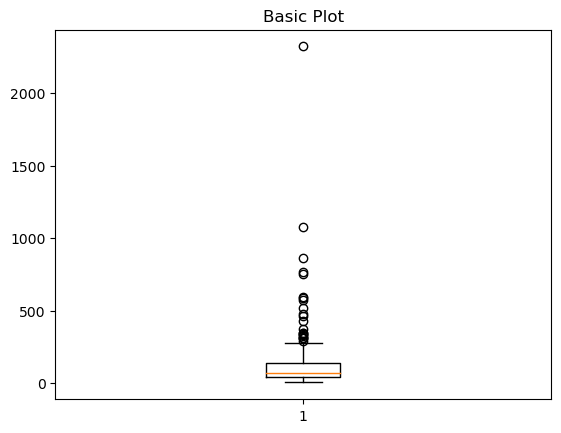

In [3]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df["mean_power"])

In [4]:
## we will remove the 10 highest value not to destabilize the model

df = df.sort_values("mean_power").iloc[0:-10]
df.sort_values("mean_power")

,number_sta,lat,lon,height_sta,mean_power,measures_number
500,74056001,45.93,6.88,1042.0,4.038674,262509.0
1,1033002,46.09,5.81,350.0,6.258305,262862.0
465,73011004,45.66,6.37,335.0,7.107616,261309.0
482,73191005,45.56,5.80,375.0,7.411819,260766.0
27,5007003,44.80,6.73,1825.0,9.095460,262771.0
...,...,...,...,...,...,...
570,84087001,44.14,4.86,55.0,344.180764,262642.0
568,84085004,43.94,5.23,488.0,346.098903,262540.0
141,13047001,43.52,4.92,24.0,371.029747,261610.0
548,83101001,43.20,6.67,107.0,429.526750,255004.0


In [5]:
## creating the train and test dataset

TEST_SIZE = 0.3
df_train, df_test = train_test_split(df, test_size = TEST_SIZE, random_state= 123 )

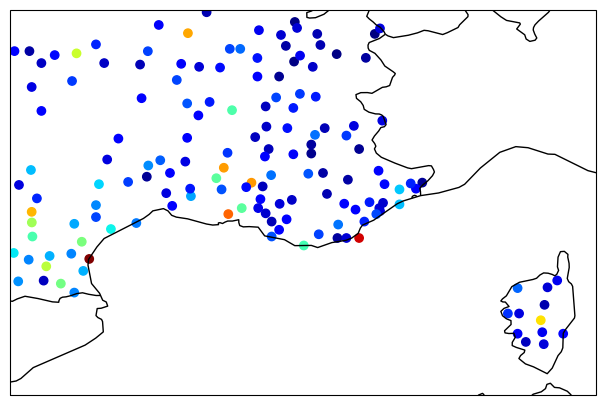

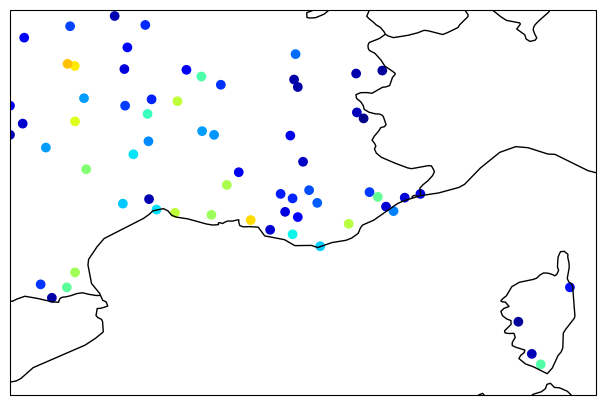

In [6]:
zone = "SE"
param = "mean_power"

_min, _max = np.amin(df[param]), np.amax(df[param])

lllat = DOMAINS[zone]['lry']  #lower left latitude
urlat = DOMAINS[zone]['uly']  #upper right latitude
lllon = DOMAINS[zone]['ulx']  #lower left longitude
urlon = DOMAINS[zone]['lrx']  #upper right longitude
extent = [lllon, urlon, lllat, urlat]

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(df_train['lon'], df_train['lat'], c=df_train[param], cmap='jet', vmin = _min, vmax = _max)  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()

fig = plt.figure(figsize=(9,5))

# Select projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the data
plt.scatter(df_test['lon'], df_test['lat'], c=df_test[param], cmap='jet', vmin = _min, vmax = _max)  # Plot

# Add coastlines and borders
ax.coastlines(resolution='50m', linewidth=1)
ax.add_feature(cfeature.BORDERS.with_scale('50m'))

# Show only the area we defined
ax.set_extent(extent)

plt.show()

Saving the train and test dataset

In [7]:
PATH_TRAIN = "data/train.csv"
PATH_TEST = "data/test.csv"
df_train.to_csv(PATH_TRAIN)
df_test.to_csv(PATH_TEST)